In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("OPTION1_uk_road_accident_2019_coursework_final.csv")

## First Glance at the dataset

In [4]:
data.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [5]:
data.shape

(31647, 14)

In [5]:
data.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


In [6]:
31647-(7622+3561)

20464

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accident_index               31647 non-null  object 
 1   speed_limit                  31647 non-null  int64  
 2   light_conditions             31647 non-null  object 
 3   weather_conditions           31647 non-null  object 
 4   road_surface_conditions      31647 non-null  object 
 5   vehicle_type                 31647 non-null  object 
 6   junction_location            31647 non-null  object 
 7   skidding_and_overturning     31647 non-null  object 
 8   vehicle_leaving_carriageway  31647 non-null  object 
 9   hit_object_off_carriageway   31647 non-null  object 
 10  first_point_of_impact        31647 non-null  object 
 11  sex_of_driver                31647 non-null  object 
 12  age_of_oldest_driver         25197 non-null  float64
 13  accident_severit

### Categorical Vs Numerical Features

In [6]:
###Continuos columns
numcols = data.select_dtypes(['number']).columns
data[numcols].head()

,speed_limit,age_of_oldest_driver
0,30,63.0
1,30,82.0
2,40,NaN
3,40,NaN
4,30,39.0


In [7]:
###Categorical columns
catcols=data.select_dtypes(['object']).columns
data[catcols].head()

,accident_index,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,accident_severity
0,2019010225080,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,serious
1,2019200908684,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,fatal
2,2019040860897,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,serious
3,2019460847205,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,serious
4,2019051911581,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,slight


##### Check the unique values of each columns.
- This is to find out if there some errors in the data

In [8]:
for col in catcols:
    print(col , data[col].unique() , '\n')

accident_index ['2019010225080' '2019200908684' '2019040860897' ... '20191369p0654'
 '2019470903814' '2019010214285'] 

light_conditions ['darkness' 'daylight'] 

weather_conditions ['other' 'fine' 'data missing or out of range' 'fog or mist'] 

road_surface_conditions ['wet or damp' 'dry' 'data missing or out of range' 'other'
 'flood over 3cm. deep'] 

vehicle_type ['at least one van' 'only cars' 'at least one biped' 'other'
 'biped and van' 'data missing or out of range'] 

junction_location ['at or within 20 metres of junction'
 'not at or within 20 metres of junction' 'data missing or out of range'] 

skidding_and_overturning ['no skidding or overturning' 'at least one vehicle skidded or overturned'
 'data missing or out of range'] 

vehicle_leaving_carriageway ['none leaving carriageway' 'at least one vehicle leaving carriageway'
 'data missing or out of range'] 

hit_object_off_carriageway ['none hit an object' 'at least one vehicle hit an object'
 'data missing or out of range'

#### Find out if there are null values in your data

In [9]:
print("Are there any null values?")
print(data.isnull().values.any() , "\n")
#Find out how many - This gives you the breakdown per column
print('How many null values are in each column?'),
print(data.isnull().sum(), "\n")
#Get total overall null values
print('How many null values are in the data in total?')
print(data.isnull().sum().sum())

Are there any null values?
True 

How many null values are in each column?
accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64 

How many null values are in the data in total?
7622


###### Showing the percentage of missing data per column.
- rows containing missing data can be dropped if the remaining data are large enough for our analysis.

In [10]:
data.isnull().sum()/len(data)   *100

accident_index                  0.000000
speed_limit                     0.000000
light_conditions                0.000000
weather_conditions              0.000000
road_surface_conditions         0.000000
vehicle_type                    0.000000
junction_location               0.000000
skidding_and_overturning        0.000000
vehicle_leaving_carriageway     0.000000
hit_object_off_carriageway      0.000000
first_point_of_impact           0.000000
sex_of_driver                   0.000000
age_of_oldest_driver           20.381079
accident_severity               3.703353
dtype: float64

##### Delete the null values

In [11]:
data_ = data.dropna()

##### Get the count of "data missing or out of range" in the dataset

In [12]:
a=data_['weather_conditions'].value_counts()['data missing or out of range']+data_['road_surface_conditions'].value_counts()['data missing or out of range']+data_['vehicle_type'].value_counts()['data missing or out of range']+data_['junction_location'].value_counts()['data missing or out of range']+data_['skidding_and_overturning'].value_counts()['data missing or out of range']+data_['vehicle_leaving_carriageway'].value_counts()['data missing or out of range']+data_['hit_object_off_carriageway'].value_counts()['data missing or out of range']+data_['first_point_of_impact'].value_counts()['data missing or out of range']+data_['sex_of_driver'].value_counts()['data missing or out of range']
print('The total occurrence of "data missing or out of range" is', a)

The total occurrence of "data missing or out of range" is 3531


##### Remove the rows containing "data missing or out of range" from all columns

In [13]:
data_=data_[data_["weather_conditions"].str.contains("data missing or out of range")== False]
data_=data_[data_["road_surface_conditions"].str.contains("data missing or out of range")== False]
data_=data_[data_["vehicle_type"].str.contains("data missing or out of range")== False]
data_=data_[data_["junction_location"].str.contains("data missing or out of range")== False]
data_=data_[data_["skidding_and_overturning"].str.contains("data missing or out of range")== False]
data_=data_[data_["vehicle_leaving_carriageway"].str.contains("data missing or out of range")== False]
data_=data_[data_["hit_object_off_carriageway"].str.contains("data missing or out of range")== False]
data_=data_[data_["first_point_of_impact"].str.contains("data missing or out of range")== False]
data_=data_[data_["sex_of_driver"].str.contains("data missing or out of range")== False]

##### In the column for accident severity , there is a little error that need to be fixed, The spelling of the enteries are not uniform

In [14]:
# we need to fix the multiple occurence of same data in accident_severity
data_['accident_severity'] = data_['accident_severity'].replace('Slight', 'slight')
data_['accident_severity'] = data_['accident_severity'].replace('Fatal' , 'fatal')
data_['accident_severity'] = data_['accident_severity'].replace('Serious' , 'serious')

### Detecting Outliers

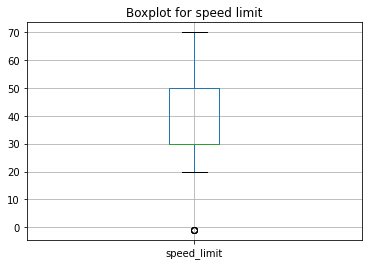

In [15]:
data_.boxplot(column=['speed_limit'], return_type='axes')
plt.title('Boxplot for speed limit')
plt.show()

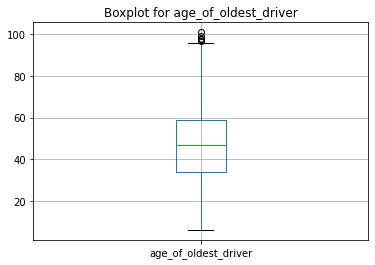

In [16]:
data_.boxplot(column=['age_of_oldest_driver'], return_type='axes')
plt.title('Boxplot for age_of_oldest_driver')
plt.show()

The detected outlier for speed_limit fall below 20 while that of age_of_oldest_driver fall above 95 years

### Removing the outliers

- Remove the enteries with speed limit less than 20 and with age_of_oldest_driver greater than 95

In [17]:
data1= data_[data_['speed_limit'] >=20]

In [18]:
data2= data1[data1['age_of_oldest_driver'] <=95]

##### UNIVARIATE ANALYSIS 

#### Viewing the distribution of numerical variables

array([[<AxesSubplot:title={'center':'speed_limit'}>,
        <AxesSubplot:title={'center':'age_of_oldest_driver'}>]],
      dtype=object)

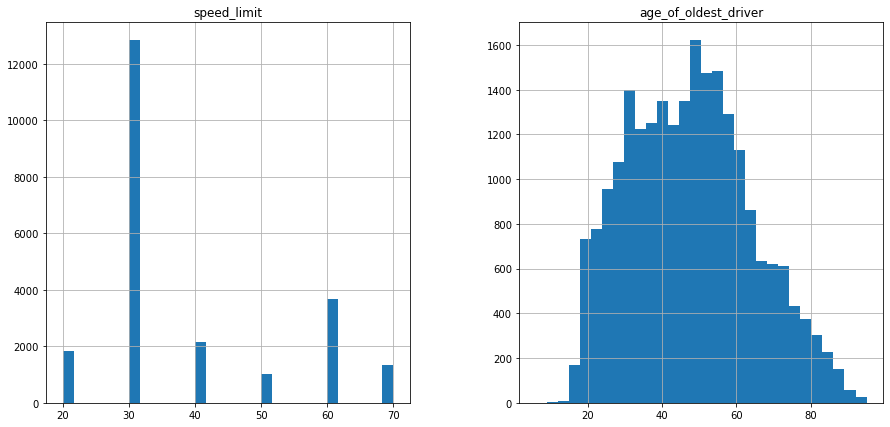

In [19]:
data2.hist(bins=30 , figsize=(15,7))

##### Viewing the count and plot of the categorical variables

In [20]:
data2['light_conditions'].value_counts()

daylight    16198
darkness     6638
Name: light_conditions, dtype: int64

<AxesSubplot:xlabel='light_conditions'>

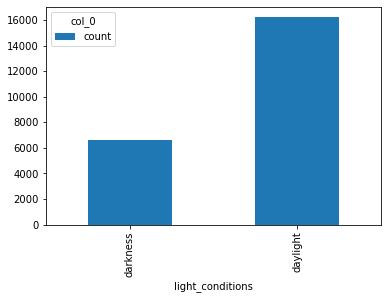

In [21]:
light_conditions = pd.crosstab(index = data2["light_conditions"],  # Make a crosstab
                              columns="count")      # Name the count column

light_conditions.plot.bar()

In [22]:
data2['weather_conditions'].value_counts()

fine           18723
other           4014
fog or mist       99
Name: weather_conditions, dtype: int64

<AxesSubplot:xlabel='weather_conditions'>

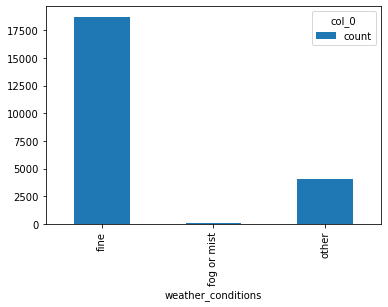

In [23]:
weather_conditions = pd.crosstab(index = data2["weather_conditions"],  # Make a crosstab
                              columns="count")      # Name the count column

weather_conditions.plot.bar()

In [24]:
data2['road_surface_conditions'].value_counts()

dry                     15727
wet or damp              6758
other                     302
flood over 3cm. deep       49
Name: road_surface_conditions, dtype: int64

<AxesSubplot:xlabel='road_surface_conditions'>

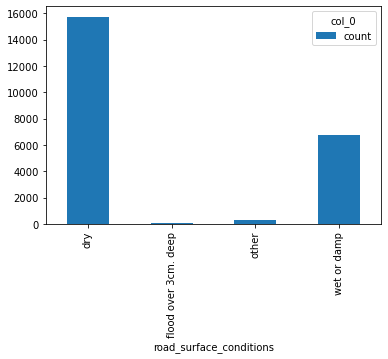

In [25]:
road_surface_conditions = pd.crosstab(index = data2["road_surface_conditions"],  # Make a crosstab
                              columns="count")      # Name the count column

road_surface_conditions.plot.bar()

In [26]:
data2['vehicle_type'].value_counts()

only cars             12761
at least one biped     6158
at least one van       2967
biped and van           686
other                   264
Name: vehicle_type, dtype: int64

<AxesSubplot:xlabel='vehicle_type'>

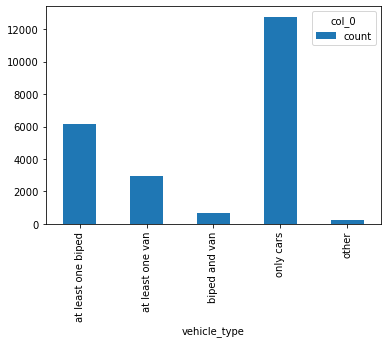

In [27]:
vehicle_type = pd.crosstab(index = data2["vehicle_type"],  # Make a crosstab
                              columns="count")      # Name the count column

vehicle_type.plot.bar()

In [28]:
data2['junction_location'].value_counts()

at or within 20 metres of junction        13198
not at or within 20 metres of junction     9638
Name: junction_location, dtype: int64

<AxesSubplot:xlabel='junction_location'>

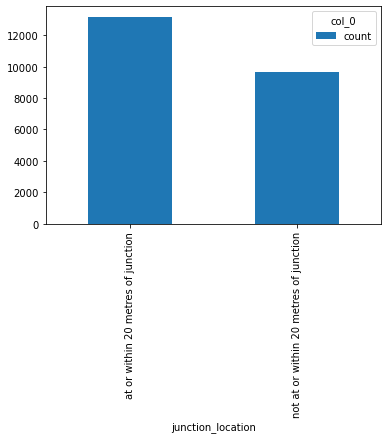

In [29]:
junction_location = pd.crosstab(index = data2["junction_location"],  # Make a crosstab
                              columns="count")      # Name the count column

junction_location.plot.bar()

In [30]:
data2['skidding_and_overturning'].value_counts()

no skidding or overturning                    18382
at least one vehicle skidded or overturned     4454
Name: skidding_and_overturning, dtype: int64

<AxesSubplot:xlabel='skidding_and_overturning'>

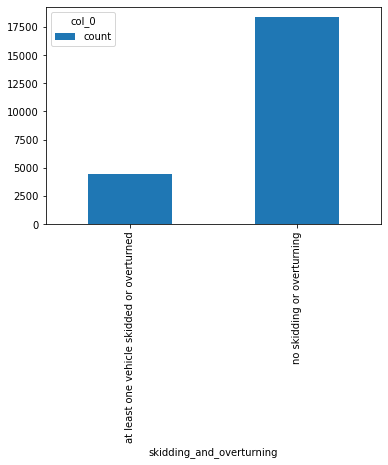

In [31]:
skidding_and_overturning = pd.crosstab(index = data2["skidding_and_overturning"],  # Make a crosstab
                              columns="count")      # Name the count column

skidding_and_overturning.plot.bar()

In [32]:
data2['vehicle_leaving_carriageway'].value_counts()

none leaving carriageway                    17980
at least one vehicle leaving carriageway     4856
Name: vehicle_leaving_carriageway, dtype: int64

<AxesSubplot:xlabel='vehicle_leaving_carriageway'>

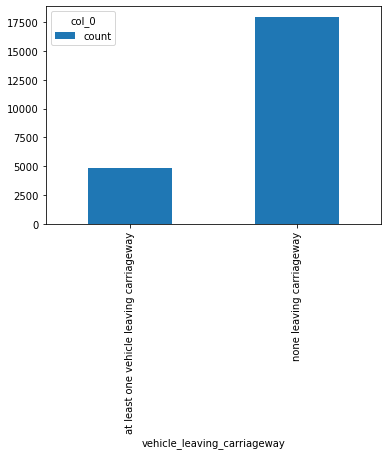

In [33]:
vehicle_leaving_carriageway = pd.crosstab(index = data2["vehicle_leaving_carriageway"],  # Make a crosstab
                              columns="count")      # Name the count column

vehicle_leaving_carriageway.plot.bar()

In [34]:
data2['hit_object_off_carriageway'].value_counts()

none hit an object                    19641
at least one vehicle hit an object     3195
Name: hit_object_off_carriageway, dtype: int64

<AxesSubplot:xlabel='hit_object_off_carriageway'>

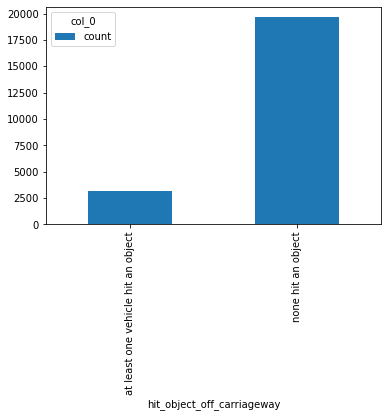

In [35]:
hit_object_off_carriageway = pd.crosstab(index = data2["hit_object_off_carriageway"],  # Make a crosstab
                              columns="count")      # Name the count column

hit_object_off_carriageway.plot.bar()

In [38]:
data2['first_point_of_impact'].value_counts()

at least one vehicle with frontal impact    17568
other points of impact                       4334
no impact                                     934
Name: first_point_of_impact, dtype: int64

<AxesSubplot:xlabel='first_point_of_impact'>

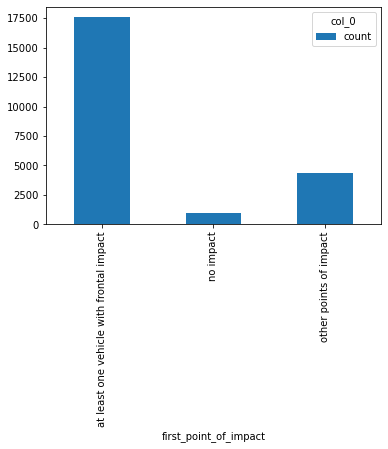

In [39]:
first_point_of_impact = pd.crosstab(index = data2["first_point_of_impact"],  # Make a crosstab
                              columns="count")      # Name the count column

first_point_of_impact.plot.bar()

In [40]:
data2['sex_of_driver'].value_counts()

all males          13356
male and female     5942
all females         3538
Name: sex_of_driver, dtype: int64

<AxesSubplot:xlabel='sex_of_driver'>

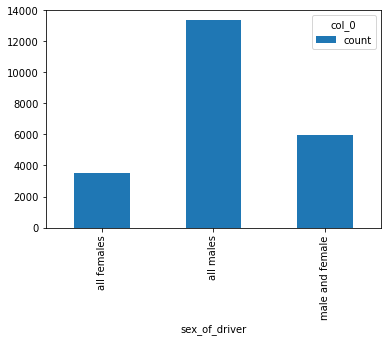

In [41]:
sex_of_driver = pd.crosstab(index = data2["sex_of_driver"],  # Make a crosstab
                              columns="count")      # Name the count column

sex_of_driver.plot.bar()

In [42]:
data2['accident_severity'].value_counts()

serious    8954
slight     8929
fatal      4953
Name: accident_severity, dtype: int64

In [43]:
data2['accident_severity'].describe()

count       22836
unique          3
top       serious
freq         8954
Name: accident_severity, dtype: object

<AxesSubplot:xlabel='accident_severity'>

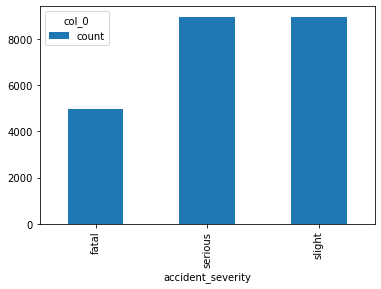

In [44]:
accident_severity = pd.crosstab(index = data2["accident_severity"],  # Make a crosstab
                              columns="count")      # Name the count column

accident_severity.plot.bar()

##### BIVARIATE ANALYSIS

<AxesSubplot:>

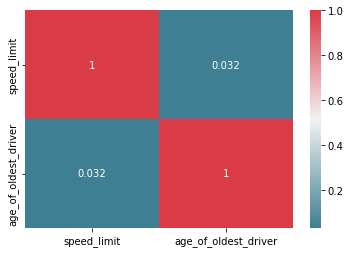

In [45]:
# Correlation analysis for the numeric Variales
corr=data2.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap=sns.diverging_palette(220, 10 , as_cmap=True),
           annot=True)

<AxesSubplot:title={'center':'speed_limit'}, xlabel='accident_severity'>

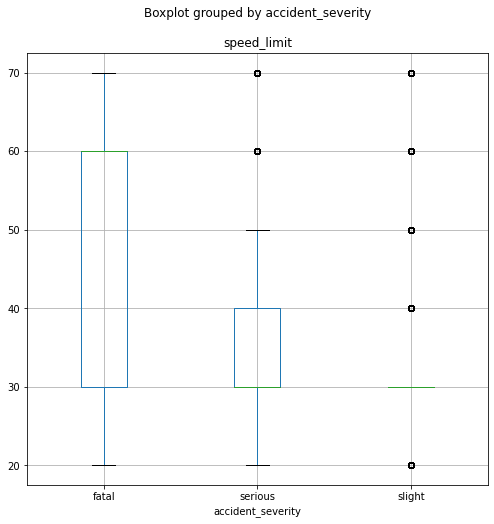

In [46]:
data2.boxplot(column="speed_limit",        # Column to plot
                 by= "accident_severity",         # Column to split upon
                 figsize= (8,8)) 

<AxesSubplot:title={'center':'age_of_oldest_driver'}, xlabel='accident_severity'>

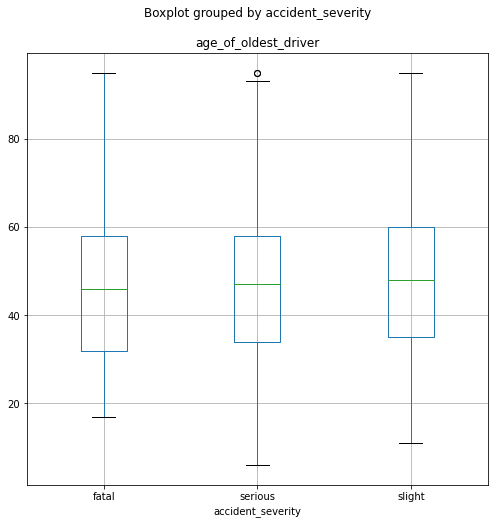

In [47]:
data2.boxplot(column="age_of_oldest_driver",        # Column to plot
                 by= "accident_severity",         # Column to split upon
                 figsize= (8,8)) 

In [48]:
#two-way table for accident severity and speed_limit
accident_severity_speed_limit= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["speed_limit"])
accident_severity_speed_limit

speed_limit,20,30,40,50,60,70
accident_severity,,,,,,
fatal,210,1505,346,179,1711,1002
serious,828,5167,759,447,1527,226
slight,796,6165,1043,391,422,112


<AxesSubplot:xlabel='accident_severity'>

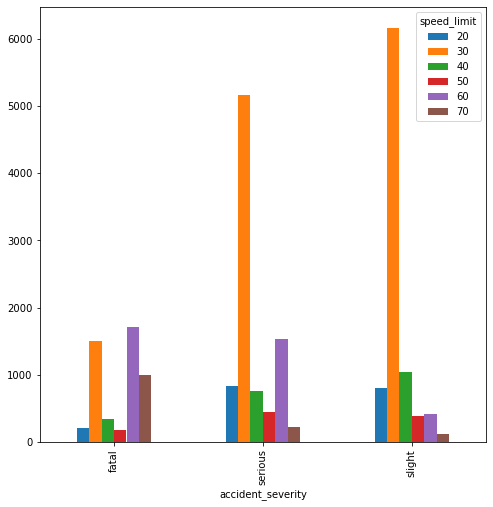

In [49]:
# Plot of accident_severity vs speed_limit
accident_severity_speed_limit.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [50]:
#two-way table for accident severity and light_conditions
accident_severity_light_conditions= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["light_conditions"])
accident_severity_light_conditions

light_conditions,darkness,daylight
accident_severity,,
fatal,2672,2281
serious,3063,5891
slight,903,8026


<AxesSubplot:xlabel='accident_severity'>

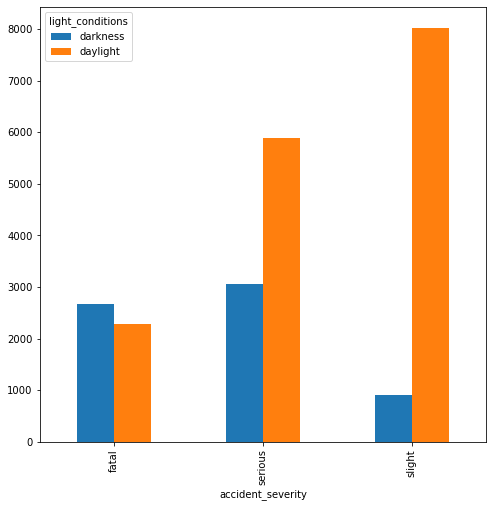

In [51]:
# Plot of accident_severity vs light_conditions
accident_severity_light_conditions.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [52]:
#two-way table for accident severity and road_surface_conditions
accident_severity_road_surface_conditions= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["road_surface_conditions"])
accident_severity_road_surface_conditions

road_surface_conditions,dry,flood over 3cm. deep,other,wet or damp
accident_severity,,,,
fatal,3276,30,109,1538
serious,5542,18,113,3281
slight,6909,1,80,1939


<AxesSubplot:xlabel='accident_severity'>

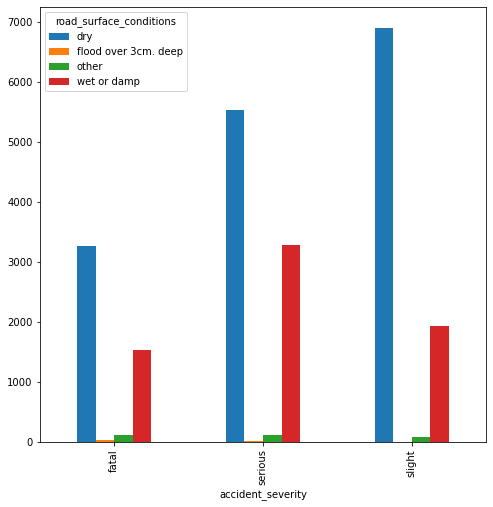

In [53]:
# Plot of accident_severity vs road_surface_conditions
accident_severity_road_surface_conditions.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [54]:
#two-way table for accident severity and vehicle_type
accident_severity_vehicle_type= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["vehicle_type"])
accident_severity_vehicle_type

vehicle_type,at least one biped,at least one van,biped and van,only cars,other
accident_severity,,,,,
fatal,205,832,475,3361,80
serious,5201,634,113,2937,69
slight,752,1501,98,6463,115


<AxesSubplot:xlabel='accident_severity'>

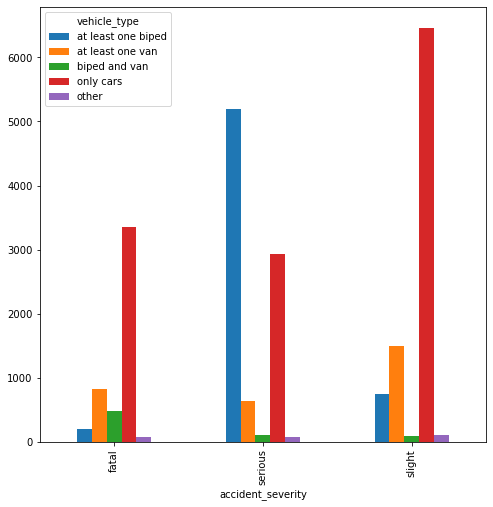

In [55]:
# Plot of accident_severity vs vehicle_type
accident_severity_vehicle_type.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [56]:
#two-way table for accident severity and junction_location
accident_severity_junction_location= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["junction_location"])
accident_severity_junction_location

junction_location,at or within 20 metres of junction,not at or within 20 metres of junction
accident_severity,,
fatal,2079,2874
serious,5554,3400
slight,5565,3364


<AxesSubplot:xlabel='accident_severity'>

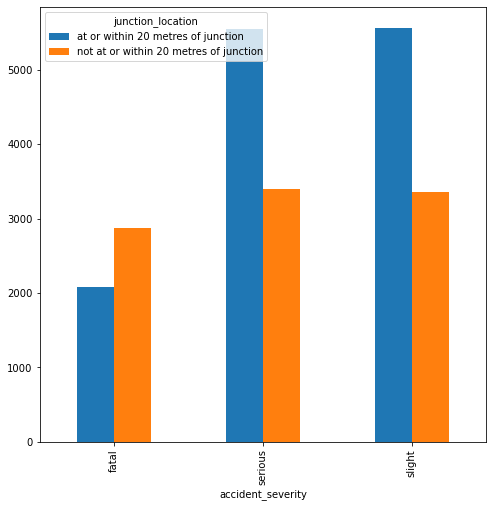

In [57]:
# Plot of accident_severity vs junction_location
accident_severity_junction_location.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [58]:
#two-way table for accident severity and skidding_and_overturning
accident_severity_skidding_and_overturning= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["skidding_and_overturning"])
accident_severity_skidding_and_overturning

skidding_and_overturning,at least one vehicle skidded or overturned,no skidding or overturning
accident_severity,,
fatal,1479,3474
serious,2039,6915
slight,936,7993


<AxesSubplot:xlabel='accident_severity'>

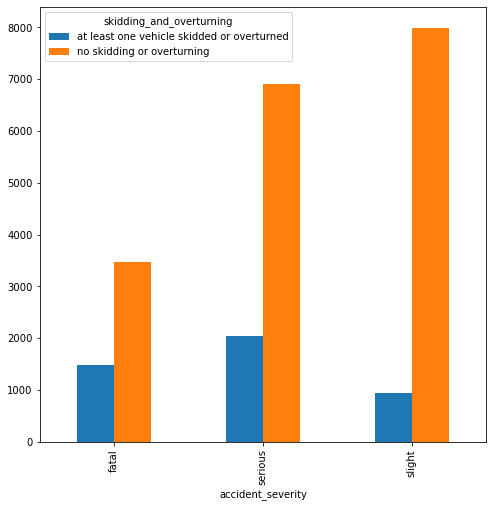

In [59]:
# Plot of accident_severity vs skidding_and_overturning
accident_severity_skidding_and_overturning.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [60]:
#two-way table for accident severity and vehicle_leaving_carriageway
accident_severity_vehicle_leaving_carriageway= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["vehicle_leaving_carriageway"])
accident_severity_vehicle_leaving_carriageway

vehicle_leaving_carriageway,at least one vehicle leaving carriageway,none leaving carriageway
accident_severity,,
fatal,1854,3099
serious,1729,7225
slight,1273,7656


<AxesSubplot:xlabel='accident_severity'>

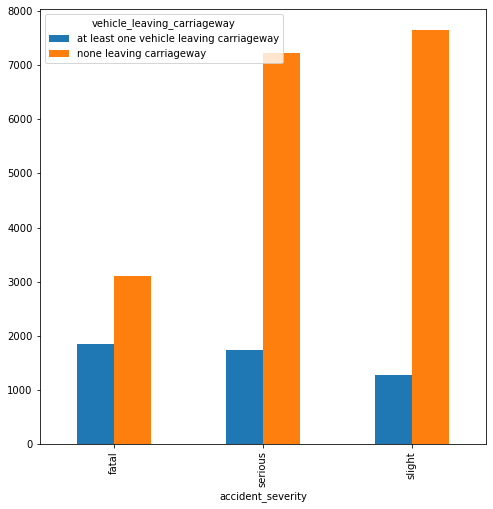

In [61]:
# Plot of accident_severity vs vehicle_leaving_carriageway
accident_severity_vehicle_leaving_carriageway.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [62]:
#two-way table for accident severity and hit_object_off_carriageway
accident_severity_hit_object_off_carriageway= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["hit_object_off_carriageway"])
accident_severity_hit_object_off_carriageway

hit_object_off_carriageway,at least one vehicle hit an object,none hit an object
accident_severity,,
fatal,1273,3680
serious,1093,7861
slight,829,8100


<AxesSubplot:xlabel='accident_severity'>

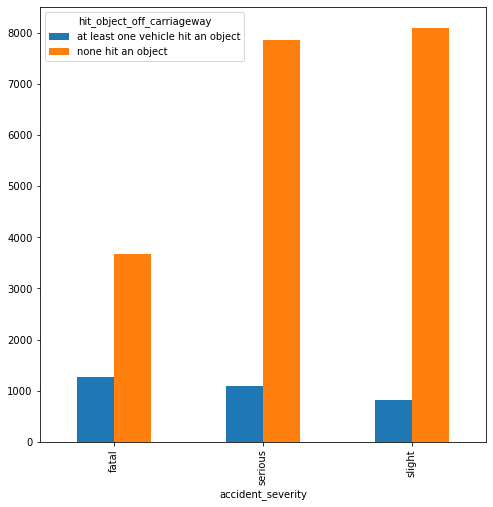

In [63]:
# Plot of accident_severity vs hit_object_off_carriageway
accident_severity_hit_object_off_carriageway.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [64]:
#two-way table for accident severity and First_point_of_impact
accident_severity_First_point_of_impact= pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["first_point_of_impact"])
accident_severity_First_point_of_impact

first_point_of_impact,at least one vehicle with frontal impact,no impact,other points of impact
accident_severity,,,
fatal,3839,144,970
serious,6967,401,1586
slight,6762,389,1778


<AxesSubplot:xlabel='accident_severity'>

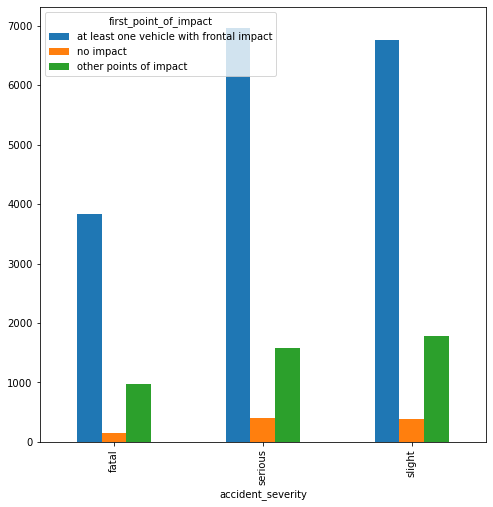

In [65]:
accident_severity_First_point_of_impact.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

In [66]:
severity_sex = pd.crosstab(index=data2["accident_severity"], 
                          columns=data2["sex_of_driver"])

severity_sex

sex_of_driver,all females,all males,male and female
accident_severity,,,
fatal,681,3232,1040
serious,970,5543,2441
slight,1887,4581,2461


<AxesSubplot:xlabel='accident_severity'>

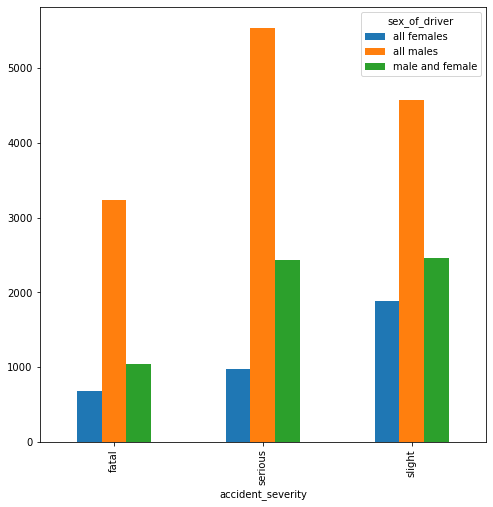

In [67]:
severity_sex.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

<AxesSubplot:xlabel='age_of_oldest_driver'>

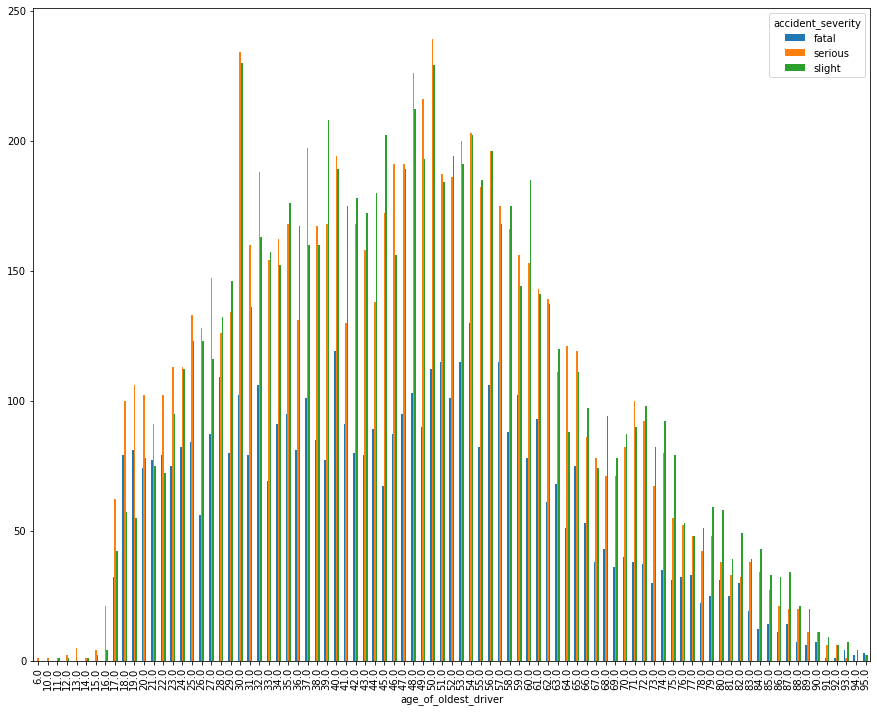

In [68]:
severity_age = pd.crosstab(index=data2["age_of_oldest_driver"], 
                          columns=data2["accident_severity"])

severity_age
severity_age.plot(kind="bar", 
                 figsize=(15,12),
                 stacked=False)

##### View the whole data in 2 D plot using Dimensionality reduction

- The column accident_index is not needed for our analysis.
- delete it

In [69]:
del data2['accident_index']

In [70]:
#pip install --user prince

In [71]:
import prince

In [72]:
data_mca=data2.applymap(str)

In [73]:
mca=prince.MCA(n_components=2)

In [74]:
mca=mca.fit(data_mca)

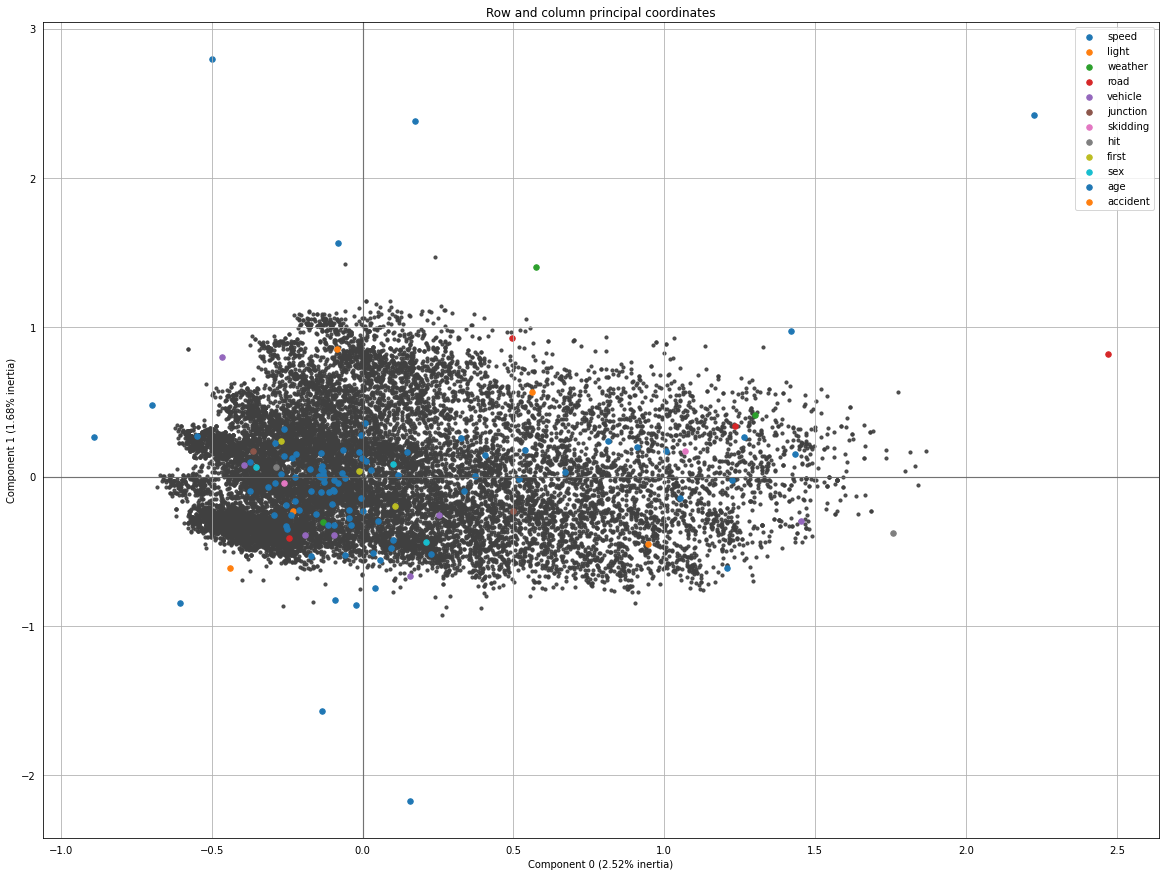

In [75]:
ax=mca.plot_coordinates(data_mca,
                       row_points_alpha=.9,
                        figsize=(20,15),
                        show_row_points=True,
                       show_column_labels=False)

#### Split Dataset into Training and Testing Set

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [37]:
X = data2.drop(['accident_severity'], axis=1)
Y = data2["accident_severity"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15300, 13)
(7536, 13)
(15300,)
(7536,)


In [39]:
#Pre-processing categorical variables

#For training data set 
X_train_cat = pd.DataFrame(X_train[['light_conditions','weather_conditions','road_surface_conditions','vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact','sex_of_driver']])
X_train_cat_encoded = pd.get_dummies(X_train_cat)
print(f" The shape of X_train_cat_encoded is: {X_train_cat_encoded.shape}")
print(X_train_cat_encoded.head(2))

 The shape of X_train_cat_encoded is: (15300, 28)
       light_conditions_darkness  light_conditions_daylight  \
29633                          0                          1   
230                            1                          0   

       weather_conditions_fine  weather_conditions_fog or mist  \
29633                        1                               0   
230                          0                               0   

       weather_conditions_other  road_surface_conditions_dry  \
29633                         0                            1   
230                           1                            0   

       road_surface_conditions_flood over 3cm. deep  \
29633                                             0   
230                                               0   

       road_surface_conditions_other  road_surface_conditions_wet or damp  \
29633                              0                                    0   
230                                0            

In [40]:
#For testing data set
X_test_cat = pd.DataFrame(X_test[['light_conditions','weather_conditions','road_surface_conditions','vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact','sex_of_driver']])
X_test_cat_encoded = pd.get_dummies(X_test_cat)
print(f" The shape of X_test_cat_encoded is: {X_test_cat_encoded.shape}")
print(X_test_cat_encoded.head(2))     

 The shape of X_test_cat_encoded is: (7536, 28)
       light_conditions_darkness  light_conditions_daylight  \
25256                          0                          1   
14062                          0                          1   

       weather_conditions_fine  weather_conditions_fog or mist  \
25256                        1                               0   
14062                        1                               0   

       weather_conditions_other  road_surface_conditions_dry  \
25256                         0                            0   
14062                         0                            0   

       road_surface_conditions_flood over 3cm. deep  \
25256                                             0   
14062                                             0   

       road_surface_conditions_other  road_surface_conditions_wet or damp  \
25256                              0                                    1   
14062                              0              

In [41]:
#normalise the continuous variables for training set
X_train_cont = X_train[['speed_limit','age_of_oldest_driver']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train_cont)
X_train_cont_new = pd.DataFrame(x_scaled, columns=X_train_cont.columns, index=X_train_cont.index)
X_train_cont_new.head()

,speed_limit,age_of_oldest_driver
29633,0.2,0.786517
230,1.0,0.247191
2194,0.2,0.584270
13238,0.4,0.528090
1644,0.2,0.719101


In [42]:
#normalise the continuous variables for testing set 
X_test_cont = X_test[['speed_limit','age_of_oldest_driver']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_test_cont)
X_test_cont_new = pd.DataFrame(x_scaled, columns=X_test_cont.columns, index=X_test_cont.index)
X_test_cont_new.head()

,speed_limit,age_of_oldest_driver
25256,0.4,0.376471
14062,0.2,0.552941
13612,0.2,0.435294
24657,0.2,0.458824
19549,0.2,0.258824


In [43]:
#Add DataFrame of continuous variables and categorical variables together for a complete training set
train_data = X_train_cat_encoded.join(X_train_cont)
#Do the same for test data
test_data = X_test_cat_encoded.join(X_test_cont)
print(train_data.shape)
print(test_data.shape)
print(Y_train.shape)
print(Y_test.shape)

(15300, 30)
(7536, 30)
(15300,)
(7536,)


In [44]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_test_1=lb.fit_transform(Y_test)

In [47]:
y_test_1

### Initial Accuracy Test for Potential Models using K fold Evaluation

In [86]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


seed = 7
models = []

models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Classifier', SVC()))

In [87]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed , shuffle=True)
    cv_results = model_selection.cross_val_score(model,train_data , Y_train.ravel(), cv=kfold, scoring=scoring)
    model.fit(train_data, Y_train)
    Y_pred = model.predict(test_data)
    
    results.append(cv_results)
    names.append(name)
    
    print('Model Name: ' , name)
    print('Cross value mean: ' , cv_results.mean())
    print('Cross value Standard Deviation: ', cv_results.std())
    print('\nClassification Report')
    print(classification_report(Y_test, Y_pred))
    print('=================================================================\n')

Model Name:  Random Forest Classifier
Cross value mean:  0.715032679738562
Cross value Standard Deviation:  0.015078078648228299

Classification Report
              precision    recall  f1-score   support

       fatal       0.63      0.68      0.66      1632
     serious       0.71      0.70      0.71      2947
      slight       0.76      0.74      0.75      2957

    accuracy                           0.71      7536
   macro avg       0.70      0.71      0.70      7536
weighted avg       0.71      0.71      0.71      7536


Model Name:  KNeighbors Classifier
Cross value mean:  0.6900000000000001
Cross value Standard Deviation:  0.010660008494829126

Classification Report
              precision    recall  f1-score   support

       fatal       0.58      0.66      0.62      1632
     serious       0.68      0.65      0.66      2947
      slight       0.74      0.72      0.73      2957

    accuracy                           0.68      7536
   macro avg       0.67      0.68      0.67 

#### boxplot for comparing the models

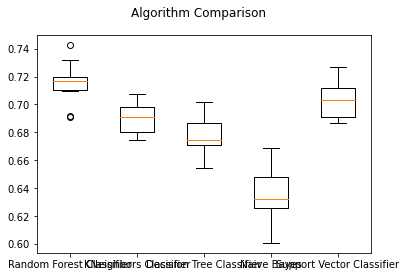

In [88]:
#boxplot for comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- Comparing the models above the statistics favour Random forest classifier and Support vector.
- Random forest has a mean of 71.58% , std of1.38% and an f1 score of 71% and there is a presence of outliers at both ends of the boxplot.
- SVM has a mean of 70.3 % , standard deviation of 1.32% and an f1 score of 71%.
- Both models have similar statistics
- I will work on both Random Forest Classifier Algorithm and Support vector

### RANDOM FOREST ALGORITHM

In [48]:
model1 = RandomForestClassifier(n_estimators= 10 , random_state=42)
model1.fit(train_data , Y_train )

RandomForestClassifier(n_estimators=10, random_state=42)

In [90]:
Y_pred =model1.predict(test_data)

In [91]:
##### Evaluating the model
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

[[1146  301  185]
 [ 409 2072  466]
 [ 282  534 2141]]
              precision    recall  f1-score   support

       fatal       0.62      0.70      0.66      1632
     serious       0.71      0.70      0.71      2947
      slight       0.77      0.72      0.74      2957

    accuracy                           0.71      7536
   macro avg       0.70      0.71      0.70      7536
weighted avg       0.71      0.71      0.71      7536



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['fatal' 'serious' 'slight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


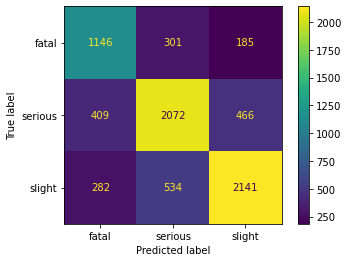

In [92]:
ConfusionMatrixDisplay(cm, model1.classes_,display_labels=['fatal' 'serious' 'slight']).plot()

### Hyperparameter Tuning for Random Forest using Randomised Search

###  Implementing Random Search Using Scikit-Learn
##### Defining the Hyperparameter Space

In [118]:
from scipy.stats import randint
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [120]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(train_data,Y_train)

In [121]:
print('Best grid search hyperparameters are: '+str(model_random.best_params_))
print('Best grid search score is: '+str(model_random.best_score_))

Best grid search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 160}
Best grid search score is: 0.7741176470588235


### Fitting model with the best parameters

In [148]:
rf_best = RandomForestClassifier(criterion='entropy' , max_depth=10,max_features=6,min_samples_leaf=2,min_samples_split=4,n_estimators=160 )
rf_best.fit(train_data , Y_train )

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=160)

In [149]:
Y_pred =rf_best.predict(test_data)

In [150]:
print("Accuracy = " , metrics.accuracy_score(Y_test, Y_pred))

Accuracy =  0.7704352441613588


In [151]:
##### Evaluating the model
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

[[1479  115   38]
 [ 534 2092  321]
 [ 386  336 2235]]
              precision    recall  f1-score   support

       fatal       0.62      0.91      0.73      1632
     serious       0.82      0.71      0.76      2947
      slight       0.86      0.76      0.81      2957

    accuracy                           0.77      7536
   macro avg       0.77      0.79      0.77      7536
weighted avg       0.79      0.77      0.77      7536



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['fatal' 'serious' 'slight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


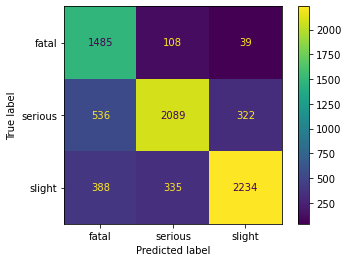

In [139]:
ConfusionMatrixDisplay(cm, rf_best.classes_,display_labels=['fatal' 'serious' 'slight']).plot()

In [140]:
feature_list = list(train_data.columns)
feature_imp = pd.Series(rf_best.feature_importances_ , index=feature_list).sort_values(ascending = False)

In [141]:
# Get the feature importance scores
importances = rf_best.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature names in order of importance
print('Feature importance:')
for i, feature in enumerate(train_data.columns[indices]):
    print(f'{i+1}. {feature}: {importances[indices[i]]:.4f}')

Feature importance:
1. vehicle_type_at least one biped: 0.2458
2. speed_limit: 0.1743
3. vehicle_type_only cars: 0.1046
4. light_conditions_daylight: 0.0923
5. light_conditions_darkness: 0.0826
6. vehicle_type_at least one van: 0.0369
7. age_of_oldest_driver: 0.0364
8. vehicle_type_biped and van: 0.0322
9. weather_conditions_fine: 0.0304
10. weather_conditions_other: 0.0290
11. road_surface_conditions_wet or damp: 0.0130
12. skidding_and_overturning_at least one vehicle skidded or overturned: 0.0118
13. vehicle_leaving_carriageway_none leaving carriageway: 0.0113
14. road_surface_conditions_dry: 0.0111
15. skidding_and_overturning_no skidding or overturning: 0.0111
16. vehicle_leaving_carriageway_at least one vehicle leaving carriageway: 0.0104
17. junction_location_at or within 20 metres of junction: 0.0095
18. junction_location_not at or within 20 metres of junction: 0.0095
19. sex_of_driver_all males: 0.0069
20. sex_of_driver_male and female: 0.0056
21. hit_object_off_carriageway_at

([<matplotlib.axis.XTick at 0x1ea10ad62e0>,
 [Text(0, 0, 'vehicle_type_at least one biped'),
  Text(1, 0, 'speed_limit'),
  Text(2, 0, 'vehicle_type_only cars'),
  Text(3, 0, 'light_conditions_daylight'),
  Text(4, 0, 'light_conditions_darkness'),
  Text(5, 0, 'vehicle_type_at least one van'),
  Text(6, 0, 'age_of_oldest_driver'),
  Text(7, 0, 'vehicle_type_biped and van'),
  Text(8, 0, 'weather_conditions_fine'),
  Text(9, 0, 'weather_conditions_other'),
  Text(10, 0, 'road_surface_conditions_wet or damp'),
  Text(11, 0, 'skidding_and_overturning_at least one vehicle skidded or overturned'),
  Text(12, 0, 'vehicle_leaving_carriageway_none leaving carriageway'),
  Text(13, 0, 'road_surface_conditions_dry'),
  Text(14, 0, 'skidding_and_overturning_no skidding or overturning'),
  Text(15, 0, 'vehicle_leaving_carriageway_at least one vehicle leaving carriageway'),
  Text(16, 0, 'junction_location_at or within 20 metres of junction'),
  Text(17, 0, 'junction_location_not at or within 20 me

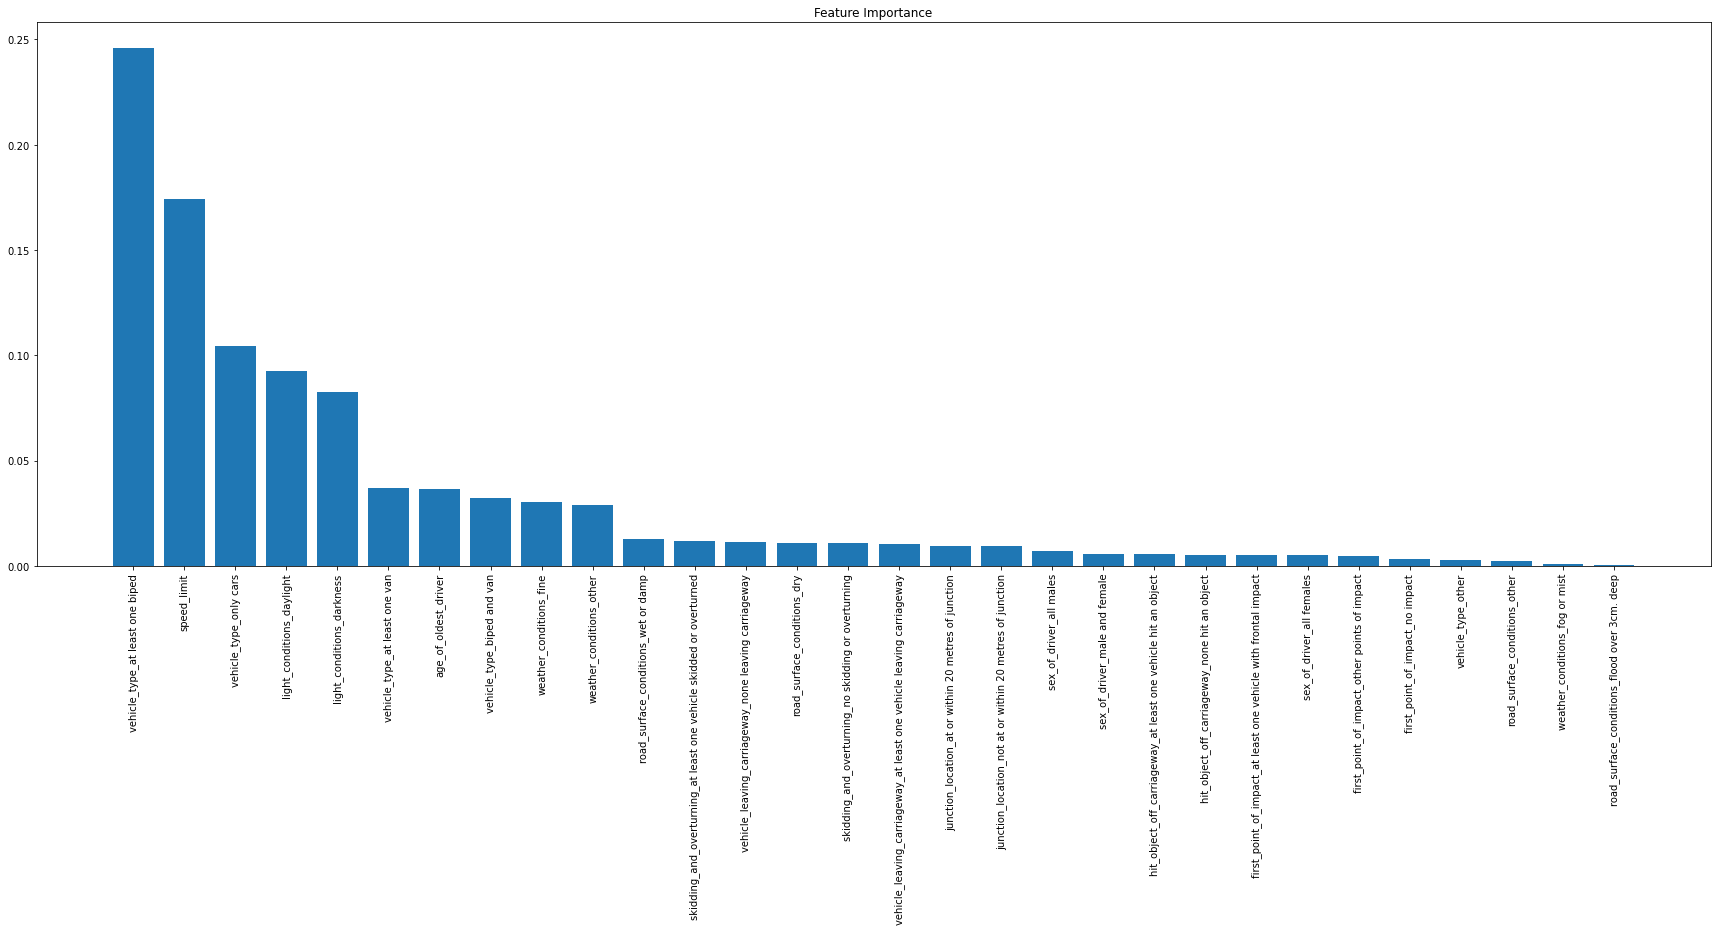

In [142]:
# Plot the feature importance scores
plt.figure(figsize=(30,10))
plt.title('Feature Importance')
plt.bar(range(train_data.shape[1]), importances[indices])
plt.xticks(range(train_data.shape[1]), train_data.columns[indices] , rotation='vertical')


### FITTING SVM ALGORITHM

- SVC USING LINEAR KERNEL

In [98]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_data, Y_train)

SVC(kernel='linear')

In [99]:
###### Making predictions with the model
Y_pred = svclassifier.predict(test_data)

In [100]:
##### Evaluating the model
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1501   99   32]
 [ 610 1951  386]
 [ 420  293 2244]]
              precision    recall  f1-score   support

       fatal       0.59      0.92      0.72      1632
     serious       0.83      0.66      0.74      2947
      slight       0.84      0.76      0.80      2957

    accuracy                           0.76      7536
   macro avg       0.76      0.78      0.75      7536
weighted avg       0.78      0.76      0.76      7536



- SVC USING GAUSSIAN KERNEL

In [101]:
svclassifier_Gaussian = SVC(kernel='rbf')
svclassifier_Gaussian.fit(train_data, Y_train)

SVC()

In [102]:
###### Making predictions with the model
Y_pred = svclassifier_Gaussian.predict(test_data)

[[ 899  185  548]
 [ 409 1990  548]
 [ 180  346 2431]]
              precision    recall  f1-score   support

       fatal       0.60      0.55      0.58      1632
     serious       0.79      0.68      0.73      2947
      slight       0.69      0.82      0.75      2957

    accuracy                           0.71      7536
   macro avg       0.69      0.68      0.68      7536
weighted avg       0.71      0.71      0.70      7536



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['fatal' 'serious' 'slight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


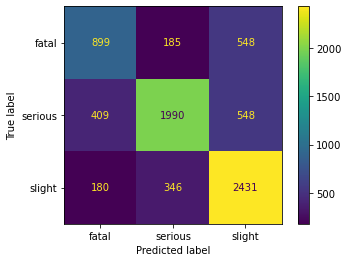

In [103]:
##### Evaluating the model
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
ConfusionMatrixDisplay(cm, svclassifier_Gaussian.classes_,display_labels=['fatal' 'serious' 'slight']).plot()

- SVC USING SIGMOID KERNEL

In [104]:
svclassifier_Sigmoid = SVC(kernel='sigmoid')
svclassifier_Sigmoid.fit(train_data, Y_train)

SVC(kernel='sigmoid')

In [105]:
###### Making predictions with the model
Y_pred = svclassifier_Sigmoid.predict(test_data)

In [106]:
##### Evaluating the model
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 855  359  418]
 [ 738  828 1381]
 [ 563  841 1553]]
              precision    recall  f1-score   support

       fatal       0.40      0.52      0.45      1632
     serious       0.41      0.28      0.33      2947
      slight       0.46      0.53      0.49      2957

    accuracy                           0.43      7536
   macro avg       0.42      0.44      0.43      7536
weighted avg       0.43      0.43      0.42      7536



the best kernel for this dataset using SVC is the gaussian kernel.

##### Hyperparameter tuning using grid search

In [109]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [10, 100, 1000],
			'gamma': [0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

# fitting the model for grid search
grid.fit(train_data, Y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  18.9s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  19.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  19.4s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  19.7s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  19.6s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=  21.8s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=  22.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=  22.4s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=  23.8s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=  24.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  33.4s
[CV] END .....................C=100, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [110]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [117]:
grid_predictions = grid.predict(test_data)

##### Evaluating the model
cm=confusion_matrix(Y_test,grid_predictions)
print(cm)

[[1479  115   38]
 [ 540 2035  372]
 [ 385  319 2253]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['fatal' 'serious' 'slight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


              precision    recall  f1-score   support

       fatal       0.62      0.91      0.73      1632
     serious       0.82      0.69      0.75      2947
      slight       0.85      0.76      0.80      2957

    accuracy                           0.77      7536
   macro avg       0.76      0.79      0.76      7536
weighted avg       0.79      0.77      0.77      7536



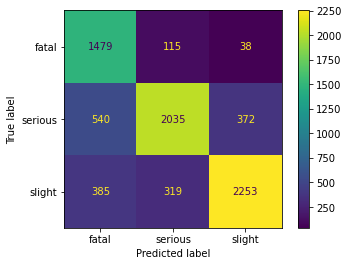

In [115]:
ConfusionMatrixDisplay(cm, svclassifier_Gaussian.classes_,display_labels=['fatal' 'serious' 'slight']).plot()

# print classification report
print(classification_report(Y_test, grid_predictions))


### Fitting a model with the best parameters

In [277]:
svc =  SVC(kernel='rbf',C=1000 , gamma=0.001)
svc.fit(train_data, Y_train)


SVC(C=1000, gamma=0.001)

In [321]:
###### Making predictions with the model
Y_pred = svc.predict(test_data)

In [322]:
##### Evaluating the model
##### Evaluating the model
cm=confusion_matrix(Y_test,grid_predictions)
print(cm)
print(classification_report(Y_test,Y_pred))

[[1479  115   38]
 [ 540 2035  372]
 [ 385  319 2253]]
              precision    recall  f1-score   support

       fatal       0.62      0.91      0.73      1632
     serious       0.82      0.69      0.75      2947
      slight       0.85      0.76      0.80      2957

    accuracy                           0.77      7536
   macro avg       0.76      0.79      0.76      7536
weighted avg       0.79      0.77      0.77      7536



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=['fatal' 'serious' 'slight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


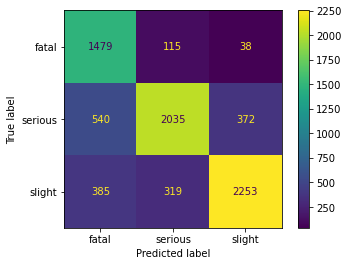

In [280]:
ConfusionMatrixDisplay(cm, svc.classes_,display_labels=['fatal' 'serious' 'slight']).plot()

##### Feature Importances for the the model

In [154]:
from sklearn.inspection import permutation_importance
import numpy as np
%matplotlib inline


perm_importance = permutation_importance(svc, test_data, Y_test)
feature_names = list(train_data.columns)

features = np.array(feature_names)



KeyboardInterrupt: 

In [ ]:
type(perm_importance.importances_mean[sorted_idx])

In [ ]:
# Plot the feature importance scores
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Neural Network

In [ ]:
#pip install tensorflow

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Activation,Dense , Dropout
from tensorflow.keras import layers

In [54]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y_labels = label_as_binary.fit_transform(Y_train)
test_y_labels=label_as_binary.fit_transform(Y_test)

In [158]:
#For testing data set
Y_test_enc=pd.DataFrame(Y_test)
Y_test_encoded =pd.get_dummies(Y_test_enc)
#print(Y_test_encoded.head())
#print(Y_test_encoded.shape)

#For training data set
Y_train_enc=pd.DataFrame(Y_train)
Y_train_encoded =pd.get_dummies(Y_train_enc)
#print(Y_train_encoded.head())
#print(Y_train_encoded.shape)

In [159]:
input_dim=len(train_data.columns)
epochs=100
input_shape=(15300, 30)

# Build neural network
model = Sequential()
model.add(Dense(71,input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(25, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))



In [160]:
#pip install pydot

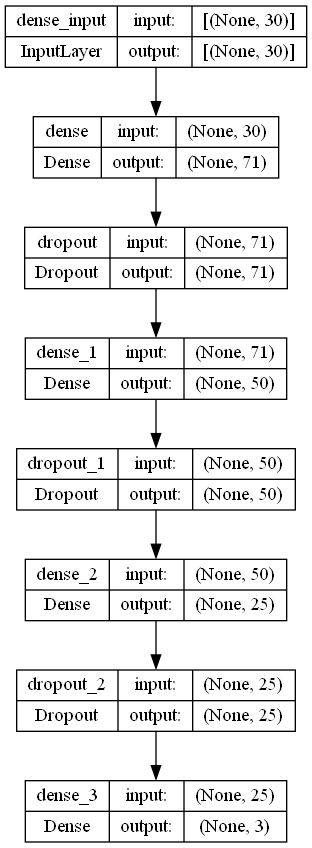

In [161]:
plot_model(model , show_shapes=True , show_layer_names=True)

In [162]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 71)                2201      
                                                                 
 dropout (Dropout)           (None, 71)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                3600      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 7

In [163]:
# Compile model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

#model.fit(train_X_input, train__y_labels, batch_size=128, epochs=1)

# Train model
model.fit(train_data, train_y_labels,
          batch_size=128,
          epochs=epochs,
          verbose=0,
          validation_data=(test_data, test_y_labels),validation_split=0.33)

In [164]:
accuracy = model.evaluate(test_data, test_y_labels)

236/236 [==============================] - 1s 3ms/step - loss: 0.6261 - categorical_accuracy: 0.7653


##### Compiling the model with RMSProp optimizer

In [165]:
# Compile model
model.compile(#optimizer='Adam',
              optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy']
              )

#model.fit(train_X_input, train__y_labels, batch_size=128, epochs=1)

# Train model
model.fit(train_data, train_y_labels,
          batch_size=128,
          epochs=epochs,
          verbose=0,
          validation_data=(test_data, test_y_labels) , validation_split=0.33)

In [166]:
accuracy = model.evaluate(test_data, test_y_labels)

236/236 [==============================] - 1s 3ms/step - loss: 0.6216 - categorical_accuracy: 0.7671


In [167]:
test_y_labels



236/236 [==============================] - 1s 3ms/step
predicted0= 1 Expected0= 1
predicted1= 2 Expected1= 2
predicted2= 1 Expected2= 1
predicted3= 1 Expected3= 1
predicted4= 1 Expected4= 1
predicted5= 2 Expected5= 2
predicted6= 1 Expected6= 2
predicted7= 0 Expected7= 0
predicted8= 1 Expected8= 1
predicted9= 0 Expected9= 0
predicted10= 1 Expected10= 1
predicted11= 0 Expected11= 2
predicted12= 1 Expected12= 1
predicted13= 0 Expected13= 0
predicted14= 0 Expected14= 0
predicted15= 0 Expected15= 2
predicted16= 0 Expected16= 0
predicted17= 2 Expected17= 2
predicted18= 1 Expected18= 1
predicted19= 2 Expected19= 2


In [168]:
##### Evaluating the model
print(confusion_matrix(label,pred))
print(classification_report(label,pred))

[[1507   88   37]
 [ 569 2038  340]
 [ 398  323 2236]]
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      1632
           1       0.83      0.69      0.76      2947
           2       0.86      0.76      0.80      2957

    accuracy                           0.77      7536
   macro avg       0.77      0.79      0.76      7536
weighted avg       0.79      0.77      0.77      7536



In [320]:
roc_auc_score(test_y_labels,model.predict(test_data))

236/236 [==============================] - 1s 2ms/step


0.8776306005414036

#### HYPERPARAMETER TUNING
- i changed epochs number to 200 , the number of neurons in input layer and the hidden layers were changed

In [171]:
input_dim=len(train_data.columns)
#neurons=64
epochs=200
input_shape=(15300, 30)

# Build neural network
model2 = Sequential()
#model2.add(layers.Flatten(input_shape=(15300, 30)))
model2.add(Dense(256,input_dim=input_dim, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

#model.add(Dense(74, activation='relu'))
#model.add(Dropout(0.25))

model2.add(Dense(3, activation='softmax'))



In [172]:
# Compile model
model2.compile(optimizer='Adam',
              #optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

#model.fit(train_X_input, train__y_labels, batch_size=128, epochs=1)

# Train model
model2.fit(train_data, train_y_labels,
          batch_size=128,
          epochs=epochs,
          verbose=0,
          validation_data=(test_data, test_y_labels),validation_split=0.33)

In [173]:
accuracy = model2.evaluate(test_data, test_y_labels)

236/236 [==============================] - 1s 3ms/step - loss: 0.6134 - categorical_accuracy: 0.7706


In [174]:
pred=model2.predict(test_data)
pred=np.argmax(pred, axis=1)[:]
label=np.argmax(test_y_labels, axis=1)[:]
for i in range(20):
    print(f'predicted{i}= {pred[i]} Expected{i}= {label[i]}')

236/236 [==============================] - 1s 2ms/step
predicted0= 1 Expected0= 1
predicted1= 2 Expected1= 2
predicted2= 1 Expected2= 1
predicted3= 1 Expected3= 1
predicted4= 1 Expected4= 1
predicted5= 2 Expected5= 2
predicted6= 1 Expected6= 2
predicted7= 0 Expected7= 0
predicted8= 1 Expected8= 1
predicted9= 0 Expected9= 0
predicted10= 1 Expected10= 1
predicted11= 0 Expected11= 2
predicted12= 1 Expected12= 1
predicted13= 0 Expected13= 0
predicted14= 0 Expected14= 0
predicted15= 0 Expected15= 2
predicted16= 0 Expected16= 0
predicted17= 2 Expected17= 2
predicted18= 1 Expected18= 1
predicted19= 2 Expected19= 2


In [175]:
##### Evaluating the model
print(confusion_matrix(label,pred))
print(classification_report(label,pred))

[[1513   83   36]
 [ 565 2055  327]
 [ 395  323 2239]]
              precision    recall  f1-score   support

           0       0.61      0.93      0.74      1632
           1       0.84      0.70      0.76      2947
           2       0.86      0.76      0.81      2957

    accuracy                           0.77      7536
   macro avg       0.77      0.79      0.77      7536
weighted avg       0.80      0.77      0.77      7536



In [319]:
roc_auc_score(test_y_labels,model2.predict(test_data))

236/236 [==============================] - 1s 2ms/step


0.8784918543025012

#### HYPERPARAMETER TUNING USING KERAS TUNER

In [289]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=3,
                                            max_value=256,
                                            step=4),
                               input_dim=input_dim,
                               activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(
        optimizer='RMSProp',
        loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model

In [290]:
#!pip install keras-tuner


In [292]:
import os
# Create a checkpoint directory to store the checkpoints.
checkpoint_dir = './new_dir'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

In [293]:
import keras_tuner

build_model(keras_tuner.HyperParameters())

In [294]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="new_dir",
    project_name="accident_severity",
)

In [295]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 256, 'step': 4, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 256, 'step': 4, 'sampling': 'linear'}


In [296]:
tuner.search(train_data, train_y_labels,batch_size=256, validation_data=(test_data, test_y_labels),validation_split=0.33)

Trial 3 Complete [00h 00m 10s]
val_accuracy: 0.4853370487689972

Best val_accuracy So Far: 0.4948248416185379
Total elapsed time: 00h 00m 28s
INFO:tensorflow:Oracle triggered exit


In [297]:
tuner.results_summary()

Results summary
Results in new_dir\accident_severity
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 63
units_1: 51
units_2: 123
units_3: 55
units_4: 123
units_5: 147
units_6: 239
units_7: 163
units_8: 91
units_9: 243
Score: 0.4948248416185379
Trial summary
Hyperparameters:
num_layers: 9
units_0: 35
units_1: 31
units_2: 147
units_3: 135
units_4: 87
units_5: 51
units_6: 71
units_7: 67
units_8: 67
units_9: 107
Score: 0.4853370487689972
Trial summary
Hyperparameters:
num_layers: 10
units_0: 211
units_1: 23
units_2: 3
units_3: 3
units_4: 3
units_5: 3
units_6: 3
units_7: 3
units_8: 3
units_9: 3
Score: 0.3917197436094284


In [298]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                1953      
                                                                 
 dense_1 (Dense)             (None, 51)                3264      
                                                                 
 dense_2 (Dense)             (None, 123)               6396      
                                                                 
 dense_3 (Dense)             (None, 55)                6820      
                                                                 
 dense_4 (Dense)             (None, 123)               6888      
                                                                 
 dense_5 (Dense)             (None, 147)               18228     
                                                                 
 dense_6 (Dense)             (None, 3)                 4

In [314]:
input_dim=len(train_data.columns)
#neurons=64
epochs=200
input_shape=(15300, 30)

# Build neural network
model3 = Sequential()

model3.add(Dense(51,input_dim=input_dim, activation='relu'))

model3.add(Dense(123, activation='relu'))

model3.add(Dense(55, activation='relu'))

model3.add(Dense(123, activation='relu'))

model3.add(Dense(147, activation='relu'))

model3.add(Dense(3, activation='softmax'))



In [315]:
# Compile model
model3.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

#model.fit(train_X_input, train__y_labels, batch_size=128, epochs=1)

# Train model
model3.fit(train_data, train_y_labels,
          batch_size=128,
          epochs=epochs,
          verbose=0,
          validation_data=(test_data, test_y_labels),validation_split=0.33)

In [316]:
accuracy = model3.evaluate(test_data, test_y_labels)


236/236 [==============================] - 1s 4ms/step - loss: 0.9410 - categorical_accuracy: 0.7221


In [317]:
##### Evaluating the model
print(confusion_matrix(label,pred))
print(classification_report(label,pred))

[[1442  141   49]
 [ 521 2104  322]
 [ 365  380 2212]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1632
           1       0.80      0.71      0.76      2947
           2       0.86      0.75      0.80      2957

    accuracy                           0.76      7536
   macro avg       0.76      0.78      0.76      7536
weighted avg       0.78      0.76      0.77      7536



In [49]:
roc_auc_score(test_y_labels,model3.predict(test_data))

NameError: name 'roc_auc_score' is not defined

### SKLEARN MULTI LEVEL PERCEPTRON (MLP)

In [50]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [51]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [55]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2 , verbose=2)
clf.fit(train_data, train_y_labels)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [82]:
y_true, y_pred = test_y_labels , clf.predict(test_data)



In [85]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))

Accuracy: 0.76


In [76]:
##### Evaluating the model

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


Results on the test set:
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1632
           1       0.81      0.71      0.76      2947
           2       0.87      0.74      0.80      2957

   micro avg       0.77      0.76      0.76      7536
   macro avg       0.77      0.78      0.76      7536
weighted avg       0.79      0.76      0.77      7536
 samples avg       0.76      0.76      0.76      7536



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
pred=y_pred
pred=np.argmax(pred, axis=1)[:]
label=np.argmax(test_y_labels, axis=1)[:]
for i in range(20):
    print(f'predicted{i}= {pred[i]} Expected{i}= {label[i]}')

predicted0= 1 Expected0= 1
predicted1= 2 Expected1= 2
predicted2= 1 Expected2= 1
predicted3= 1 Expected3= 1
predicted4= 1 Expected4= 1
predicted5= 2 Expected5= 2
predicted6= 1 Expected6= 2
predicted7= 0 Expected7= 0
predicted8= 1 Expected8= 1
predicted9= 0 Expected9= 0
predicted10= 1 Expected10= 1
predicted11= 0 Expected11= 2
predicted12= 1 Expected12= 1
predicted13= 0 Expected13= 0
predicted14= 0 Expected14= 0
predicted15= 0 Expected15= 2
predicted16= 0 Expected16= 0
predicted17= 2 Expected17= 2
predicted18= 1 Expected18= 1
predicted19= 2 Expected19= 2
